In [2]:
!pip install timm

In [3]:
# ensure that any edits to libraries you make are reloaded here automatically
%reload_ext autoreload
%autoreload 2

# ensure that any charts or images displayed are shown in this notebook
%matplotlib inline


In [4]:
from google.colab import files
import os

In [5]:
#!pip install "fastai==2.7.12"

In [6]:
import timm
from fastai.vision.all import *

In [7]:
# fastai V1 library which sits on top of Pytorch 1.0
from fastai.vision import *

In [8]:
# to avoid warning of PyTorch
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#!unzip -u "/content/drive/My Drive/arch.zip" -d "/content/drive/My Drive/dataset"

In [11]:
os.listdir('/content/drive/My Drive/dataset')

['README.txt', 'architectural-styles-dataset', 'g-images-dataset']

In [12]:
path = '/content/drive/My Drive/dataset/architectural-styles-dataset'

In [13]:
import os
import pandas as pd
import numpy as np
from fastai.vision.all import *
from fastcore.parallel import *
from sklearn.metrics import classification_report

In [14]:
np.random.seed(42)

In [15]:
files = get_image_files(path)

(1000, 442)


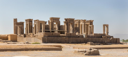

In [16]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [17]:
from fastcore.parallel import *
def f(o):
  return PILImage.create(o).size

sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(800, 600)     1442
(450, 600)      479
(1000, 667)     290
(800, 533)      286
(1000, 750)     238
               ... 
(640, 454)        1
(610, 370)        1
(500, 300)        1
(640, 456)        1
(756, 600)        1
Length: 3344, dtype: int64

In [18]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, item_tfms=Resize(100, method='squish')) #batch_tfms=aug_transforms(size=120,min_scale=0.75)) dls.show_batch(max_n=9)

In [19]:
learn = vision_learner(dls, 'resnet26', metrics=error_rate, path='.').to_fp16()

model.safetensors:   0%|          | 0.00/64.1M [00:00<?, ?B/s]

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.034159,2.049023,0.579624,01:58
1,2.063041,1.788840,0.523244,01:52
2,1.445978,1.658284,0.487636,01:50
3,1.101587,1.652447,0.491098,01:49


In [21]:
learn.save('stage-1-resnet26')

Path('models/stage-1-resnet26.pth')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

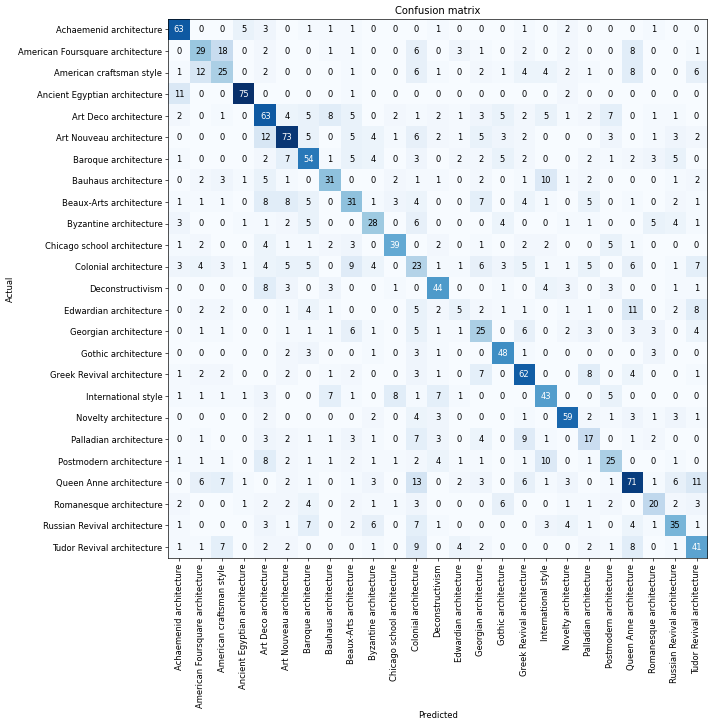

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=5)

[('American Foursquare architecture', 'American craftsman style', 18),
 ('Queen Anne architecture', 'Colonial architecture', 13),
 ('American craftsman style', 'American Foursquare architecture', 12),
 ('Art Nouveau architecture', 'Art Deco architecture', 12),
 ('Ancient Egyptian architecture', 'Achaemenid architecture', 11),
 ('Edwardian architecture', 'Queen Anne architecture', 11),
 ('Queen Anne architecture', 'Tudor Revival architecture', 11),
 ('Bauhaus architecture', 'International style', 10),
 ('Postmodern architecture', 'International style', 10),
 ('Colonial architecture', 'Beaux-Arts architecture', 9),
 ('Palladian architecture', 'Greek Revival architecture', 9),
 ('Tudor Revival architecture', 'Colonial architecture', 9),
 ('American Foursquare architecture', 'Queen Anne architecture', 8),
 ('American craftsman style', 'Queen Anne architecture', 8),
 ('Art Deco architecture', 'Bauhaus architecture', 8),
 ('Beaux-Arts architecture', 'Art Deco architecture', 8),
 ('Beaux-Arts

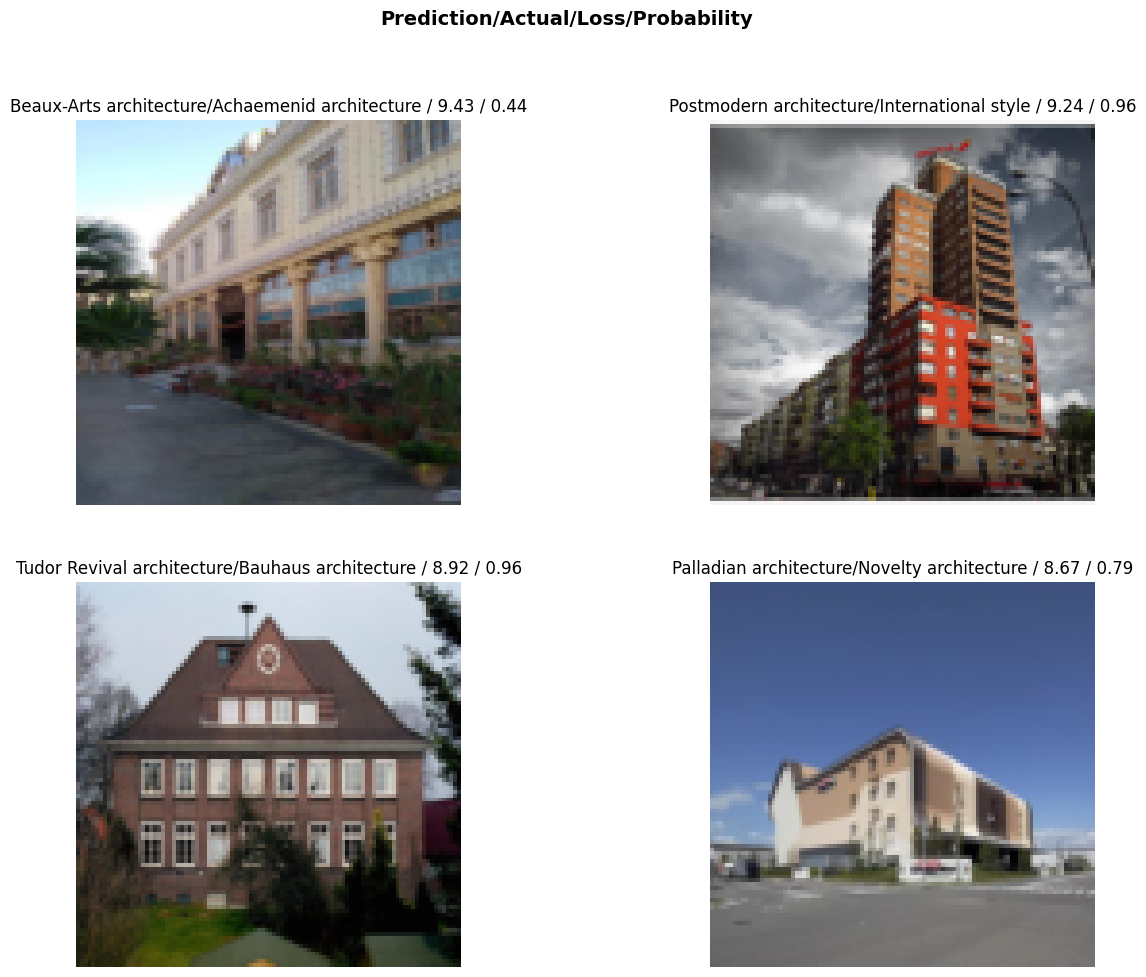

In [25]:
interp.plot_top_losses(4, figsize=(15,11))

In [26]:
learn.unfreeze()

SuggestedLRs(valley=6.918309736647643e-06)

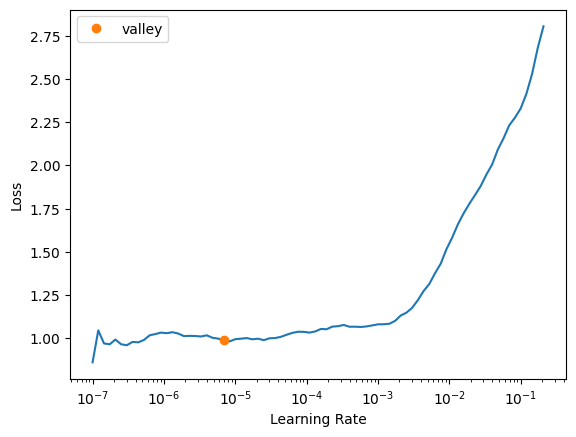

In [27]:
learn.lr_find()

In [28]:
learn.fit_one_cycle(4, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.019755,1.618917,0.477250,01:53
1,0.933672,1.597598,0.469832,01:55
2,0.776679,1.601234,0.465381,01:55
3,0.706374,1.578537,0.460435,01:54
